In [ ]:
pip install nltk


In [ ]:
# No installation needed if using Colab
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10


In [ ]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names
class_names = ['Airplane','Car','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


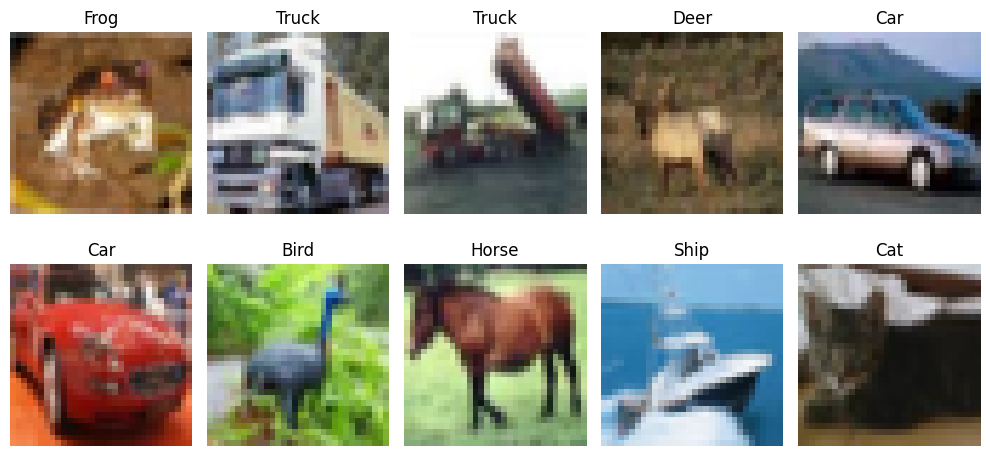

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3509 - loss: 1.7368 - val_accuracy: 0.5613 - val_loss: 1.2337
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5757 - loss: 1.1961 - val_accuracy: 0.6047 - val_loss: 1.1195
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6411 - loss: 1.0088 - val_accuracy: 0.6347 - val_loss: 1.0319
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6851 - loss: 0.8955 - val_accuracy: 0.6749 - val_loss: 0.9251
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7101 - loss: 0.8270 - val_accuracy: 0.6754 - val_loss: 0.9401
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7338 - loss: 0.7650 - val_accuracy: 0.7036 - val_loss: 0.8666
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7525 - loss: 0.7102 - val_accuracy: 0.6874 - val_loss: 0.9190
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7635 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')


313/313 - 3s - 11ms/step - accuracy: 0.7174 - loss: 0.8502

Test accuracy: 0.72


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


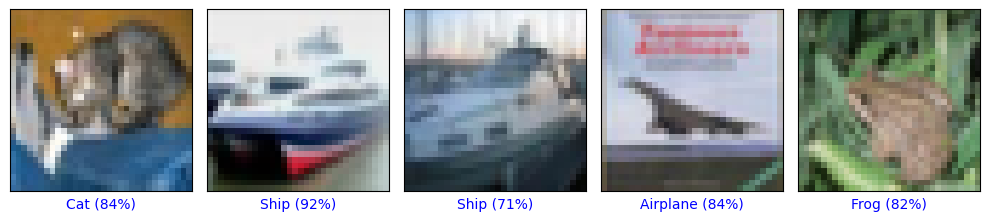

In [ ]:
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%)", color=color)

# Show 5 predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()


In [ ]:
model.save("cnn_image_classifier.h5")
